In [1]:
print("38.Improved sources of drinking water")

38.Improved sources of drinking water


In [3]:
df_1.isnull().sum()

State            0
Sector           0
Indicator        0
Sub Indicator    0
Value            0
dtype: int64

In [7]:
# Converting 'Value' column to numeric
df_1['Value'] = pd.to_numeric(df_1['Value'], errors='coerce')

In [12]:
#DATA PREPARATION 

df_1_clean = df_1.dropna(subset=['Value'])

# To Verify cleaned data
print("Cleaned Dataset Info:")
print(df_1_clean.info())


key_indicators = ['Improved Source of Drinking Water Located in the Household Premises',
                  'Improved Source of Drinking Water Located in the Household Premises Which is Sufficiently Available Throughout the Year',
                  'Exclusive Access to Improved Source of Drinking Water Located in the Household Premises',
                  'Exclusive Access to Improved Source of Drinking Water Located in the Household Premises Which is Sufficiently Available Throughout the Year',
                  'Piped Water into Dwelling or Yard/plot Which was Sufficiently Available Throughout the Year']

df_1_key = df_1_clean[df_1_clean['Sub Indicator'].isin(key_indicators)]


df_1_key.to_csv('cleaned_nss_data.csv', index=False)
print("Cleaned data saved as 'cleaned_nss_data.csv'")

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          555 non-null    object 
 1   Sector         555 non-null    object 
 2   Indicator      555 non-null    object 
 3   Sub Indicator  555 non-null    object 
 4   Value          555 non-null    float64
dtypes: float64(1), object(4)
memory usage: 21.8+ KB
None
Cleaned data saved as 'cleaned_nss_data.csv'


In [16]:
# DATA ANALYSIS
print("\nAnalysis of Access to Improved Water Sources:")

all_india = df_1_key[df_1_key['State'] == 'All India']
print(all_india.pivot(index='Sector', columns='Sub Indicator', values='Value'))


states = ['Odisha', 'Uttar Pradesh', 'Andhra Pradesh']
for state in states:
    state_data = df_1_key[df_1_key['State'] == state]
    print(f"\n{state} Rural vs. Urban Disparities:")
    print(state_data.pivot(index='Sector', columns='Sub Indicator', values='Value'))

# Identify underdeveloped regions (low rural access to improved sources)
rural_improved = df_1_key[(df_1_key['Sector'] == 'Rural') & 
                        (df_1_key['Sub Indicator'] == 'Improved Source of Drinking Water Located in the Household Premises')]
low_access_states = rural_improved[rural_improved['Value'] < 40].sort_values(by='Value')
print("\nStates with Low Rural Access (<40%):")
print(low_access_states[['State', 'Value']])


sufficiency_data = df_1_key[df_1_key['Sub Indicator'].str.contains('Sufficiently Available')]
print("\nSufficiency and Exclusive Access Summary (All India):")
print(sufficiency_data[sufficiency_data['State'] == 'All India'].pivot(index='Sector', columns='Sub Indicator', values='Value'))


Analysis of Access to Improved Water Sources:
Sub Indicator  Exclusive Access to Improved Source of Drinking Water Located in the Household Premises  \
Sector                                                                                                   
All                                                         55.3                                         
Rural                                                       50.6                                         
Urban                                                       66.5                                         

Sub Indicator  Exclusive Access to Improved Source of Drinking Water Located in the Household Premises Which is Sufficiently Available Throughout the Year  \
Sector                                                                                                                                                       
All                                                         52.2                                          

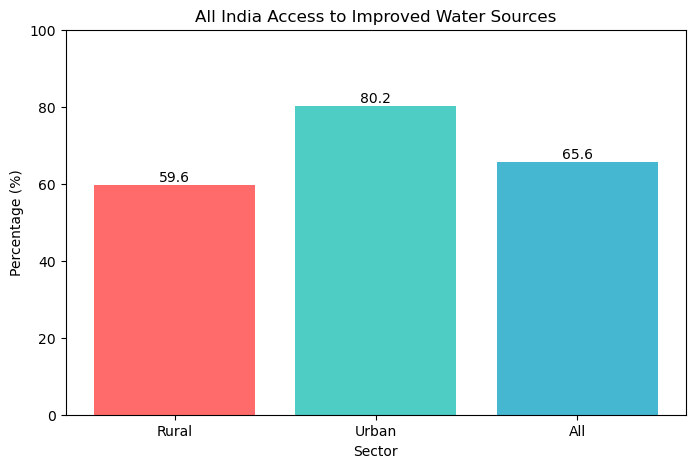

<Figure size 640x480 with 0 Axes>

In [14]:
#DATA VISUALISATION
import matplotlib.pyplot as plt
# Example: Bar chart for All India rural vs. urban improved water access
all_india_improved = df_1_key[(df_1_key['State'] == 'All India') & 
                            (df_1_key['Sub Indicator'] == 'Improved Source of Drinking Water Located in the Household Premises')]
plt.figure(figsize=(8, 5))
plt.bar(all_india_improved['Sector'], all_india_improved['Value'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('All India Access to Improved Water Sources')
plt.ylabel('Percentage (%)')
plt.xlabel('Sector')
plt.ylim(0, 100)
for i, v in enumerate(all_india_improved['Value']):
    plt.text(i, v + 1, str(v), ha='center')
plt.show()

# Save the plot (optional, adjust path for IBM Cloud)
plt.savefig('all_india_water_access.png')

In [15]:
#  policy recommendations based on analysis
low_access = low_access_states['State'].tolist()
print("\nPolicy Recommendations:")
print(f"1. Target underdeveloped regions with low rural access (e.g., {', '.join(low_access)}) with infrastructure for piped water.")
print("2. Ensure year-round sufficiency, especially in states with low piped water availability (e.g., Uttar Pradesh rural 3%).")
print("3. Promote equitable access aligned with SDG 6 through targeted investments in rural areas.")


Policy Recommendations:
1. Target underdeveloped regions with low rural access (e.g., Odisha, Jharkhand, Chhattisgarh, Andhra Pradesh, Meghalaya, Madhya Pradesh, Manipur) with infrastructure for piped water.
2. Ensure year-round sufficiency, especially in states with low piped water availability (e.g., Uttar Pradesh rural 3%).
3. Promote equitable access aligned with SDG 6 through targeted investments in rural areas.


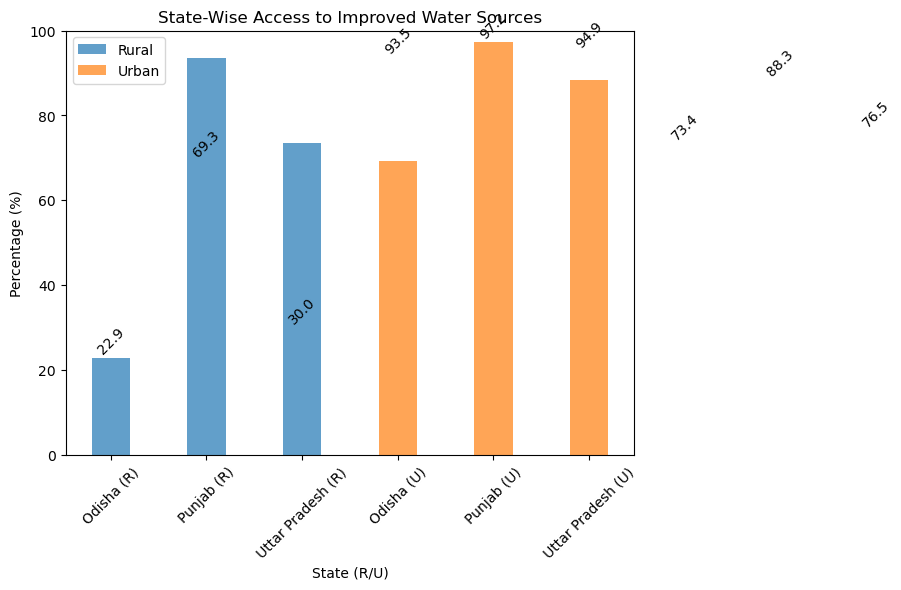

<Figure size 640x480 with 0 Axes>

In [17]:
# Add this to the Visualization section
states_to_plot = ['Odisha', 'Uttar Pradesh', 'Punjab']
state_data = df_1_key[(df_1_key['State'].isin(states_to_plot)) & 
                    (df_1_key['Sub Indicator'] == 'Improved Source of Drinking Water Located in the Household Premises')]
plt.figure(figsize=(10, 6))
for sector in ['Rural', 'Urban']:
    sector_data = state_data[state_data['Sector'] == sector]
    plt.bar(sector_data['State'] + ' (' + sector[0] + ')', sector_data['Value'], 
            label=sector, alpha=0.7, width=0.4)
plt.title('State-Wise Access to Improved Water Sources')
plt.ylabel('Percentage (%)')
plt.xlabel('State (R/U)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 100)
for i, v in enumerate(state_data['Value']):
    plt.text(i, v + 1, str(v), ha='center', rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('state_wise_water_access.png')

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

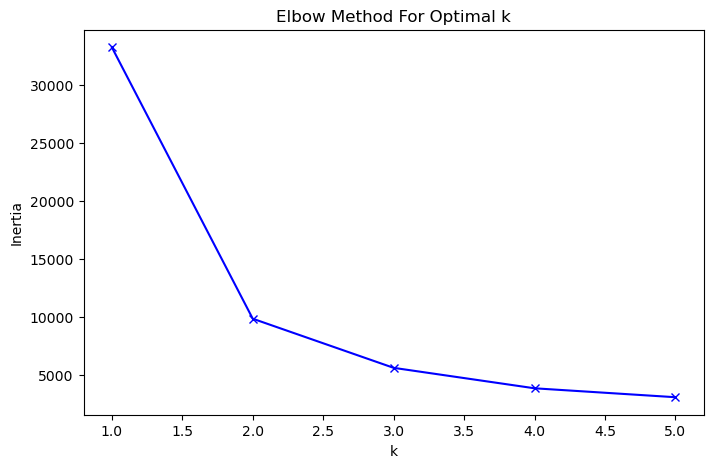

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Centers (Mean Access %):
           Improved Source of Drinking Water Located in the Household Premises  \
Cluster 0                                          89.228205                     
Cluster 1                                          48.978788                     
Cluster 2                                          72.220513                     

           Improved Source of Drinking Water Located in the Household Premises Which is Sufficiently Available Throughout the Year  \
Cluster 0                                          81.782051                                                                         
Cluster 1                                          44.872727                                                                         
Cluster 2                                          66.766667                                                                         

           Exclusive Access to Improved Source of Drinking Water Located in the Household Premises  

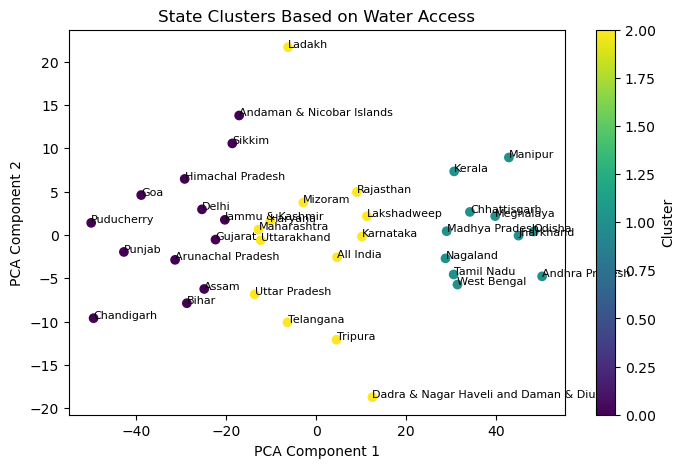

In [27]:
# Clustering using K-means to group states by water access patterns
X_cluster = df_1_pivot[key_indicators].values

# Determine optimal number of clusters using the elbow method
inertia = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply K-means with k=3 (adjust based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df_1_pivot['Cluster'] = kmeans.fit_predict(X_cluster)

# Display cluster centers and state assignments
print("\nCluster Centers (Mean Access %):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=key_indicators, index=[f'Cluster {i}' for i in range(3)]))
print("\nStates and Their Clusters:")
print(df_1_pivot[['State', 'Cluster']])

# Visualize clusters (example with 2D PCA for simplicity)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_1_pivot['Cluster'], cmap='viridis')
plt.title('State Clusters Based on Water Access')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
for i, txt in enumerate(df_1_pivot['State']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), size=8)
plt.show()

In [22]:
# Clean data and subset key indicators
df_1_clean = df_1.dropna(subset=['Value'])

key_indicators = ['Improved Source of Drinking Water Located in the Household Premises',
                  'Improved Source of Drinking Water Located in the Household Premises Which is Sufficiently Available Throughout the Year',
                  'Exclusive Access to Improved Source of Drinking Water Located in the Household Premises']

df_1_key = df_1_clean[df_1_clean['Sub Indicator'].isin(key_indicators)]

# Pivot data for clustering (state-wise average access)
df_1_pivot = df_1_key.pivot_table(index='State', columns='Sub Indicator', values='Value', aggfunc='mean').reset_index()

# Debug: Check if pivoting worked
print("\nPivoted Dataframe:")
print(df_1_pivot.head())
if df_1_pivot.empty:
    print("Error: df_pivot is empty. Check if key_indicators match dataset columns.")
else:
    print("df_pivot created successfully with shape:", df_1_pivot.shape)

# Handle missing values
df_1_pivot = df_1_pivot.fillna(0)  # Replace NaN with 0 (adjust if needed)

# Save cleaned data
df_1_key.to_csv('cleaned_nss_data.csv', index=False)
print("Cleaned data saved as 'cleaned_nss_data.csv'")


Pivoted Dataframe:
Sub Indicator                      State  \
0                              All India   
1              Andaman & Nicobar Islands   
2                         Andhra Pradesh   
3                      Arunachal Pradesh   
4                                  Assam   

Sub Indicator  Exclusive Access to Improved Source of Drinking Water Located in the Household Premises  \
0                                                      57.466667                                         
1                                                      80.400000                                         
2                                                      28.766667                                         
3                                                      79.200000                                         
4                                                      72.500000                                         

Sub Indicator  Improved Source of Drinking Water Located in the Household Prem

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset (adjust path based on IBM Cloud asset)


In [33]:
# Clean data and subset key indicators
df_1_clean = df_1.dropna(subset=['Value'])

key_indicators = ['Improved Source of Drinking Water Located in the Household Premises',
                  'Improved Source of Drinking Water Located in the Household Premises Which is Sufficiently Available Throughout the Year',
                  'Exclusive Access to Improved Source of Drinking Water Located in the Household Premises']

df_1_key = df_1_clean[df_1_clean['Sub Indicator'].isin(key_indicators)]

# Pivot data for clustering and decision tree
df_1_pivot = df_1_key.pivot_table(index='State', columns='Sub Indicator', values='Value', aggfunc='mean').reset_index()

# Debug: Check pivoted data
print("\nPivoted Dataframe:")
print(df_1_pivot.head())
if df_1_pivot.empty or not all(ind in df_1_pivot.columns for ind in key_indicators):
    print("Error: df_pivot is empty or missing key indicators. Check column names:")
    print(df_1_pivot.columns.tolist())
else:
    print("df_pivot created successfully with shape:", df_1_pivot.shape)

# Handle missing values
df_1_pivot = df_1_pivot.fillna(0)

# Create target variable (high/low access based on median)
median_access = df_1_pivot[key_indicators].mean(axis=1).median()
df_1_pivot['Target'] = (df_1_pivot[key_indicators].mean(axis=1) > median_access).astype(int)

# Verify Target column
print("\nDataframe with Target:")
print(df_1_pivot[['State', 'Target']].head())

# Save cleaned data
df_1_key.to_csv('cleaned_nss_data.csv', index=False)
print("Cleaned data saved as 'cleaned_nss_data.csv'")


Pivoted Dataframe:
Sub Indicator                      State  \
0                              All India   
1              Andaman & Nicobar Islands   
2                         Andhra Pradesh   
3                      Arunachal Pradesh   
4                                  Assam   

Sub Indicator  Exclusive Access to Improved Source of Drinking Water Located in the Household Premises  \
0                                                      57.466667                                         
1                                                      80.400000                                         
2                                                      28.766667                                         
3                                                      79.200000                                         
4                                                      72.500000                                         

Sub Indicator  Improved Source of Drinking Water Located in the Household Prem


X shape: (37, 3) y shape: (37,)

Decision Tree Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

  Low Access       1.00      1.00      1.00         4
 High Access       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



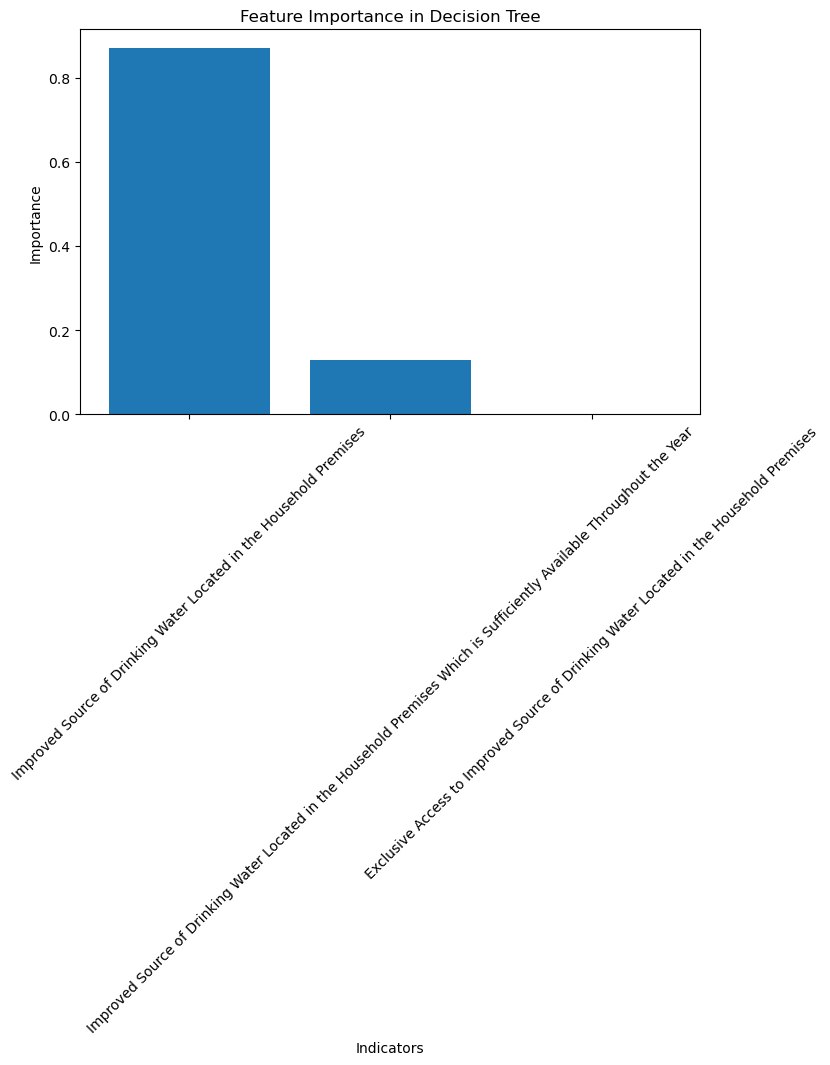

In [34]:
# Import necessary libraries
try:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report
    import matplotlib.pyplot as plt
except ImportError:
    print("Required libraries not found. Installing scikit-learn...")
    !pip install scikit-learn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report
    import matplotlib.pyplot as plt

# Prepare data for decision tree (predict high/low access)
X = df_1_pivot[key_indicators].values  # Use df_pivot, not df_1_pivot
y = df_1_pivot['Target'].values

# Debug: Check shapes
print("\nX shape:", X.shape, "y shape:", y.shape)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Access', 'High Access']))

# Feature importance
importances = dt_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(key_indicators, importances)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Indicators')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()